In [100]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [101]:
data = pd.read_csv('weatherHistory.csv')
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00+02:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00+02:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00+02:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00+02:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [102]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['Formatted Date'] = data['Formatted Date'].dt.date
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['dayofyear'] = data['Formatted Date'].dt.dayofyear
data['year'] = data['Formatted Date'].dt.year
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,dayofyear,year
0,2006-03-31 00:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,90,2006
1,2006-03-31 00:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,90,2006
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,91,2006
3,2006-04-01 00:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,91,2006
4,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,91,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 00:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,253,2016
96449,2016-09-09 00:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,253,2016
96450,2016-09-09 00:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,253,2016
96451,2016-09-09 00:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,253,2016


In [103]:
tempreture = data.groupby(['dayofyear','year'])['Temperature (C)'].mean().reset_index()
tempreture

,dayofyear,year,Temperature (C)
0,1,2006,4.075000
1,1,2007,3.806713
2,1,2008,-5.663194
3,1,2009,-4.850926
4,1,2010,7.807407
...,...,...,...
4014,365,2015,-4.304861
4015,365,2016,0.117593
4016,366,2008,-6.218056
4017,366,2012,-3.249306


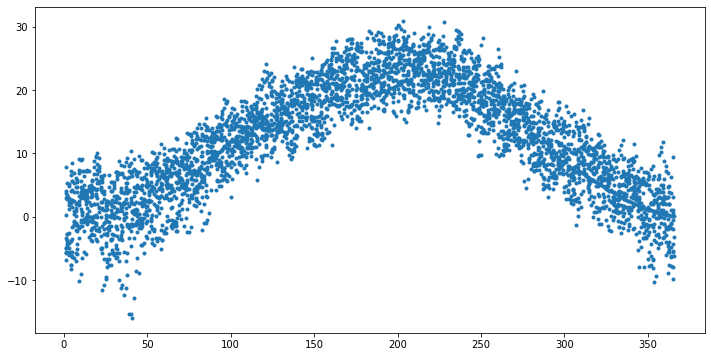

In [104]:
plt.figure(figsize=(12,6))
plt.scatter(tempreture['dayofyear'],tempreture['Temperature (C)'],marker='.')

In [105]:
class Perceptron:
    def __init__(self,lr_w=0.001,lr_b=0.01,epochs=1):
        self.lr_w = lr_w
        self.lr_b = lr_b
        self.epoch = epochs
        self.w = np.random.rand(1,1)
        self.b = np.random.rand(1,1)
        
    def fit(self,X_train,Y_train):
        Errors = []
        self.W = []
        self.B = []
        # fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
        fig2 = plt.figure(figsize=(12,6))
        ax1 = fig2.add_subplot(2,1,1)
        ax2 = fig2.add_subplot(2,1,2)
        for epoch in range(self.epoch):
            for i in range(X_train.shape[0]):
                y_pred = np.matmul(X_train[i],self.w) + self.b
                e = Y_train[i] - y_pred  #khata yek dade
                self.w = self.w + e * self.lr_w * X_train[i]
                self.b = self.b + e * self.lr_b
                self.W.append(self.w)
                self.B.append(self.b)
                
                #visualization
                Y_pred = np.matmul(X_train, self.w) + self.b

                Error = np.mean(Y_train - Y_pred)  #khata kol dadeha
                Errors.append(Error)
                

            ax1.clear()
            ax1.scatter(X_train,Y_train,c='blue',marker='.',label='data')
            ax1.plot(X_train,Y_pred,c='red',label='fitted line')
            ax1.set(xlabel='Day Of Year', ylabel='Temperature (C)')
            plt.legend()
            
            ax2.clear()
            ax2.plot(Errors)
            plt.xlabel('Iteration')
            plt.ylabel('Errors')
            plt.legend()
            
            plt.show()
        np.save('wandb_train.npy', self.W+self.B)
    
    def predict(self,X):
        Y_pred = np.matmul(X,self.w) + self.b
        
        return Y_pred
    
    def evaluate(self,X,Y):
        
        Y_pred = np.matmul(X,self.w) + self.b
        Error = Y - Y_pred
        
        return np.mean(Error**2)
            


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


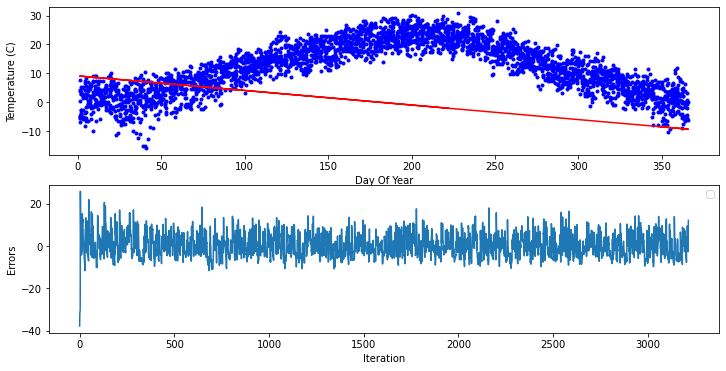

In [106]:
X = tempreture['dayofyear'].values
Y = tempreture['Temperature (C)'].values
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
X
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)


perceptron = Perceptron(lr_w=0.00001,lr_b=0.01,epochs=1)
perceptron.fit(X_train,y_train)

In [107]:
Y_pred = perceptron.predict(X)


In [108]:
evaluate_train = perceptron.evaluate(X_train,y_train)
evaluate_train

268.31421968697066

In [109]:
evaluate_test = perceptron.evaluate(X_test,y_test)
evaluate_test

258.39959253178796